In [1]:
# pymc3がない人はコメントアウト
import numpy as np
import pymc3 as pm3
import pymc as pm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import optimize

/Users/haya/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
MU = 10.0
SIGMA = 1.0

y0 = np.random.normal(MU, SIGMA, size=100)
y1 = np.random.normal(MU, SIGMA, size=1000)
y2 = np.random.normal(MU, SIGMA, size=10000)

y = [y0, y1, y2]

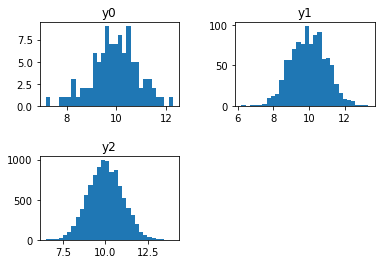

In [18]:
plt.close()

fig = plt.figure()
fig.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(3):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.set_title("y" + str(i))
    ax.hist(y[i], bins=30)
plt.show()

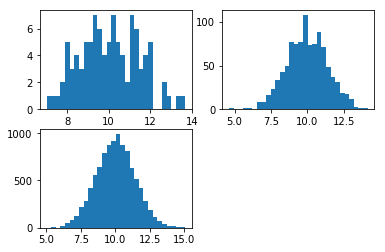

In [19]:
for i in range(3):
    size = 10**(i + 2)
    x = [1 for j in range(size)]
    glm = sm.GLM(np.array(y[i]), np.array(x), family=sm.families.Gaussian())
    res = glm.fit()
    print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                Gaussian   Df Model:                            0
Link Function:               identity   Scale:                  0.873611809999
Method:                          IRLS   Log-Likelihood:                -134.64
Date:                Wed, 27 Sep 2017   Deviance:                       86.488
Time:                        11:48:17   Pearson chi2:                     86.5
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9356      0.093    106.300      0.000       9.752      10.119
                 Generalized Linear Model Regression

Optimization terminated successfully.
         Current function value: 14274.826561
         Iterations: 3
         Function evaluations: 73


100%|██████████| 5000/5000 [00:01<00:00, 2717.57it/s]


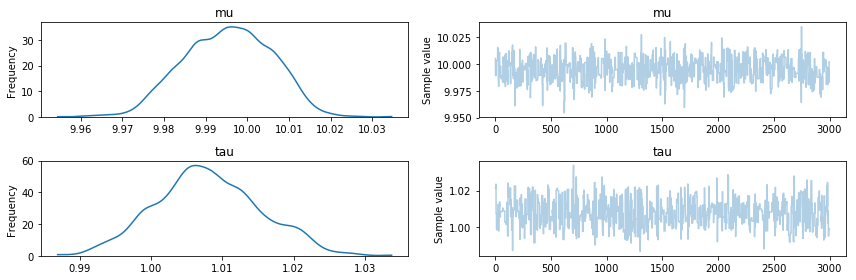


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  9.995            0.011            0.000            [9.975, 10.013]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  9.975          9.988          9.995          10.003         10.014


tau:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.008            0.007            0.000            [0.995, 1.022]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.994          1.003          1.008          1.013          1.022



In [24]:
with pm3.Model() as model:
    mu = pm3.Uniform("mu", upper= 10**2, lower= -(10**2))
    tau = pm3.Uniform("tau", upper= 10**2, lower= 0)
    Y_obs = pm3.Normal("Y_obs", mu=mu, sd=tau, observed=np.array(y2)) #ここのyを書き換えてください
    
with model:
    start = pm3.find_MAP(fmin=optimize.fmin_powell)
    step = pm3.Metropolis()
    trace = pm3.sample(5000, start=start, step=step)
    pm3.traceplot(trace[2000:])
    plt.show()
    pm3.summary(trace[2000:])